<a href="https://colab.research.google.com/github/HJJunn/hands-on-machine-learning/blob/main/10_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'3.8.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
#검증세트 만들기, 입력특성의 스케일 조정 / 255.0
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

**시퀀셜 API를 사용하여 모델 만들기**

In [ ]:
model = keras.models.Sequential() #시퀀셜 모델 만들기
model.add(keras.layers.Flatten(input_shape = [28, 28])) #Flatten은 이미지를 1D 배열로 변환 28*28
model.add(keras.layers.Dense(300, activation = "relu")) #뉴런 300개를 가진 은닉층 ReLU 활성화 함수
model.add(keras.layers.Dense(100, activation = "relu")) #뉴런 100개를 가진 은닉층 ReLU 활성화 함수
model.add(keras.layers.Dense(10, activation = "softmax")) #뉴런 10개를 가진 Dense 출력층 배타적이므로 softmax 활성화 함수

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
weights, bias = hidden1.get_weights()

In [ ]:
weights

array([[-0.00120798,  0.02120908, -0.06963658, ...,  0.06647623,
        -0.01383521,  0.03504166],
       [-0.03557045, -0.0319438 ,  0.05975883, ..., -0.03370279,
         0.03701986,  0.07092099],
       [ 0.04567153, -0.02143104,  0.07027428, ..., -0.03020052,
        -0.04231794, -0.07323252],
       ...,
       [ 0.01311021,  0.02105577,  0.04215624, ..., -0.07037637,
        -0.04715949, -0.01439047],
       [-0.06025128,  0.05826963, -0.04211924, ...,  0.06586319,
        -0.03748808, -0.01602266],
       [ 0.05290145, -0.00034225, -0.04205264, ...,  0.01152175,
         0.06585555,  0.0380762 ]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
bias.shape

(300,)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",  # == optimizer = keras.optimizer.SGD(lr = ???) , 기본값은 0.01
              metrics = ["accuracy"])

#클래스가 배타적이므로 "sparse_categorical_crossentropy" 사용
#만약 클래스별 타깃 확률을 가지고 있다면 "categorical_crossentrophy" 손실 사용
#이진 분류나 다중 레이블 분류면 출력층 활성화 함수 sigmoid 함수와 "binary_crossentrophy" 손실 사용
#sgd 는 기본 확률적 경사하강법으로 역전파 알고리즘 수행
#분류이므로 정확도 측정을 위해 "accuracy"

클래스가 배타적이므로 "sparse_categorical_crossentrophy" 사용


만약 클래스별 타깃 확률을 가지고 있다면 "categorical_crossentrophy" 손실 사용


이진 분류나 다중 레이블 분류면 출력층 활성화 함수 sigmoid 함수와 "binary_crossentrophy" 손실 사용


sgd 는 기본 확률적 경사하강법으로 역전파 알고리즘 수행


분류이므로 정확도 측정을 위해 "accuracy"

In [ ]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6822 - loss: 0.9877 - val_accuracy: 0.8290 - val_loss: 0.5048
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8219 - loss: 0.5060 - val_accuracy: 0.8416 - val_loss: 0.4536
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8420 - loss: 0.4525 - val_accuracy: 0.8652 - val_loss: 0.4095
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8529 - loss: 0.4201 - val_accuracy: 0.8614 - val_loss: 0.4042
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8598 - loss: 0.3997 - val_accuracy: 0.8714 - val_loss: 0.3808
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8661 - loss: 0.3789 - val_accuracy: 0.8666 - val_loss: 0.3848
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8687 - loss: 0.3723 - val_accuracy: 0.8718 - val_loss: 0.3718
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8715 - loss: 0.360

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

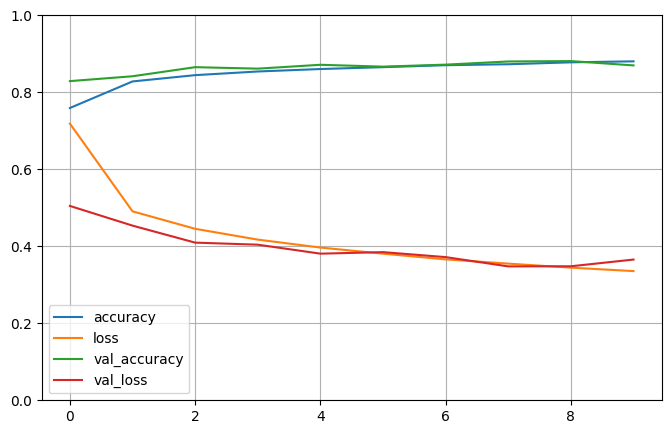

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8519 - loss: 0.4032


[0.4067109525203705, 0.8493000268936157]

In [ ]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8830 - loss: 0.3288 - val_accuracy: 0.8846 - val_loss: 0.3376
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8873 - loss: 0.3145 - val_accuracy: 0.8848 - val_loss: 0.3272
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8865 - loss: 0.3159 - val_accuracy: 0.8844 - val_loss: 0.3357
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8900 - loss: 0.3098 - val_accuracy: 0.8888 - val_loss: 0.3163
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8911 - loss: 0.3028 - val_accuracy: 0.8864 - val_loss: 0.3221
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8945 - loss: 0.2947 - val_accuracy: 0.8888 - val_loss: 0.3208
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8940 - loss: 0.2886 - val_accuracy: 0.8874 - val_loss: 0.3132
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9000 - loss: 0.27

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.91],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 회귀 MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

회귀는 분류와 다르게 출력층이 활성화 함수가 없는 하나의 뉴런을 가짐

손실함수 : 평균제곱오차

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]), # X_train (샘플 수, 특성 수 ) X_train.shape[1:] 특성만 반환
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.8230 - val_loss: 1.2223
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8981 - val_loss: 0.7012
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7372 - val_loss: 0.6357
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6802 - val_loss: 0.5973
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6406 - val_loss: 0.5650
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6090 - val_loss: 0.5371
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5823 - val_loss: 0.5132
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5595 - val_loss: 0.4927
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5397 - val_loss: 0.4761
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5230 - val_loss: 0.4627
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5091 - val_loss: 0.4520
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

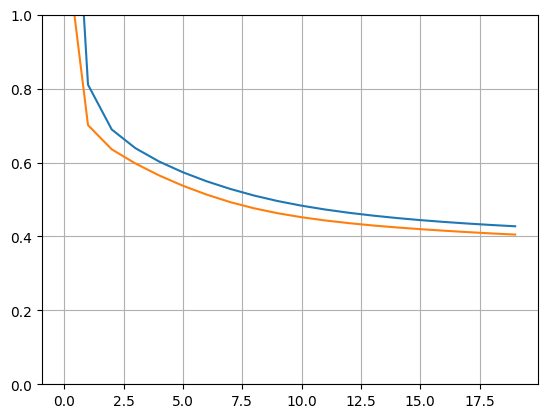

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 와이드 딥 신경망

In [ ]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_) # 입력층과 연결
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1) # hidden1층과 연결
concat = keras.layers.Concatenate()([input_, hidden2]) # 입력층과 hidden2와 결합
output = keras.layers.Dense(1)(concat) #출력층을 concat과 연결
model = keras.Model(inputs = [input_], outputs = [output])

In [ ]:
input_A = keras.layers.Input(shape = [5], name = "wide_input") #5개의 특성 짧은 경로
input_B = keras.layers.Input(shape = [6], name = "deep_input") #6개의 특성 깊은 경로
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [ ]:
model.compile(loss="mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
#입력층이 두개 출력층 한개
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs =20, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8111 - val_loss: 1.4369
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7902 - val_loss: 0.7220
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7047 - val_loss: 0.6248
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6626 - val_loss: 0.5883
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6309 - val_loss: 0.5566
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6039 - val_loss: 0.5300
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5802 - val_loss: 0.5081
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5600 - val_loss: 0.4898
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.5425 - val_loss: 0.4748
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5276 - val_loss: 0.4620
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5145 - val_loss: 0.4512
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

출력층이 여러개

In [ ]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [ ]:
model.compile(loss = ["mean_squared_error", "mean_squared_error"], loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD(learning_rate =1e-3))
history = model.fit([X_train_A, X_train_B],[y_train, y_train], epochs = 10,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)
total_loss , main_loss,aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A , X_new_B])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 0.9652 - loss: 0.5103 - main_output_loss: 0.4598 - val_aux_output_loss: 1.4486 - val_loss: 0.5112 - val_main_output_loss: 0.4069
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.9437 - loss: 0.5047 - main_output_loss: 0.4559 - val_aux_output_loss: 1.3681 - val_loss: 0.5014 - val_main_output_loss: 0.4050
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - aux_output_loss: 0.9235 - loss: 0.4996 - main_output_loss: 0.4525 - val_aux_output_loss: 1.2946 - val_loss: 0.4928 - val_main_output_loss: 0.4036
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.9046 - loss: 0.4951 - main_output_loss: 0.4496 - val_aux_output_loss: 1.2261 - val_loss: 0.4850 - val_main_output_loss: 0.4025
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 0.8869 - loss: 0.4909 - main_output_loss: 0.4469 - val_aux_output_loss: 1.1636 - val_loss: 0.4779 - val_main_output_loss: 0.4015


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


모델 저장하기

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

## 콜백 사용하기

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb]
)
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
336/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9993

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9238 - val_loss: 2.0902
Epoch 2/10
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9594

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9554 - val_loss: 0.8852
Epoch 3/10
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7537

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7501 - val_loss: 0.6543
Epoch 4/10
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6769

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6730 - val_loss: 0.5759
Epoch 5/10
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6226

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6201 - val_loss: 0.5316
Epoch 6/10
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5794

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5789 - val_loss: 0.4992
Epoch 7/10
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5478

363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5461 - val_loss: 0.4744
Epoch 8/10
340/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5218

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5195 - val_loss: 0.4552
Epoch 9/10
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4986

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4979 - val_loss: 0.4404
Epoch 10/10
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4811

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4803 - val_loss: 0.4292


In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = [X_valid, y_valid],
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4679

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4660 - val_loss: 0.4213
Epoch 2/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4544

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4541 - val_loss: 0.4157
Epoch 3/100
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4461

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4444 - val_loss: 0.4123
Epoch 4/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4367

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4363 - val_loss: 0.4104
Epoch 5/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4305

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4293 - val_loss: 0.4095
Epoch 6/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4241

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4232 - val_loss: 0.4089
Epoch 7/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4180

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4178 - val_loss: 0.4076
Epoch 8/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4138

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4131 - val_loss: 0.4065
Epoch 9/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4099

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4091 - val_loss: 0.4058
Epoch 10/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4066

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4054 - val_loss: 0.4048
Epoch 11/100
331/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4038

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4022 - val_loss: 0.4043
Epoch 12/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3998

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3993 - val_loss: 0.4031
Epoch 13/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3971

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3967 - val_loss: 0.4017
Epoch 14/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3946

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3943 - val_loss: 0.4002
Epoch 15/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3921

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3921 - val_loss: 0.3989
Epoch 16/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3904

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3900 - val_loss: 0.3977
Epoch 17/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3883

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3880 - val_loss: 0.3961
Epoch 18/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3866

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3862 - val_loss: 0.3947
Epoch 19/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3850

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3845 - val_loss: 0.3935
Epoch 20/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3836

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3829 - val_loss: 0.3924
Epoch 21/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3821

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3814 - val_loss: 0.3914
Epoch 22/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3808

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3800 - val_loss: 0.3902
Epoch 23/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3789

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3787 - val_loss: 0.3892
Epoch 24/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3777

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3774 - val_loss: 0.3884
Epoch 25/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3764

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3762 - val_loss: 0.3877
Epoch 26/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3756

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3750 - val_loss: 0.3868
Epoch 27/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3741

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3739 - val_loss: 0.3858
Epoch 28/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3730

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3728 - val_loss: 0.3851
Epoch 29/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3726

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3718 - val_loss: 0.3842
Epoch 30/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3711

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3709 - val_loss: 0.3833
Epoch 31/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3708

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3700 - val_loss: 0.3825
Epoch 32/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3694

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3691 - val_loss: 0.3817
Epoch 33/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3690

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3683 - val_loss: 0.3802
Epoch 34/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3678

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3674 - val_loss: 0.3788
Epoch 35/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3672

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3666 - val_loss: 0.3769
Epoch 36/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3663

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3659 - val_loss: 0.3771
Epoch 37/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3653

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3651 - val_loss: 0.3767
Epoch 38/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3646

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3644 - val_loss: 0.3769
Epoch 39/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3642

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3637 - val_loss: 0.3782
Epoch 40/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3632

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3630 - val_loss: 0.3783
Epoch 41/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3631

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3624 - val_loss: 0.3789
Epoch 42/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3622

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3618 - val_loss: 0.3785
Epoch 43/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3616

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3612 - val_loss: 0.3787
Epoch 44/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3608

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3606 - val_loss: 0.3791
Epoch 45/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3602

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3600 - val_loss: 0.3787
Epoch 46/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3599

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3595 - val_loss: 0.3785
Epoch 47/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3594

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3589 - val_loss: 0.3783


## 하이퍼파라미터 튜닝